In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [69]:
def read_jsonl_to_dataframe(filepath):
    """ Reads a JSON Lines file into a Pandas DataFrame."""
    try:
        df = pd.read_json(filepath, lines=True, convert_dates=False)
        return df
    except Exception as e:
        print(f"Error reading jsonl to dataframe: {e}")
        return None

In [70]:
food_data = "llm_output.json"

df = read_jsonl_to_dataframe(food_data)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [71]:
df.shape
df.describe()
print(df.columns)
feature_lst = ['Cuisine', 'Happiness_Level', 'Meal_Course','Sugar', 'Salt', 'Healthy', 'Processing_level', 'Preparation_Method','Dominant_Color', 'Food_Diversity']

def chk_unique_val(df,feature_lst):
    for f in feature_lst:
        # print(f"feature name is {f} and unique values are :\n {df[f].unique()}")
        print(f"{f} Distribution:\n", df[f].value_counts())

Index(['name', 'size', 'date', 'Cuisine', 'Happiness_Level', 'Meal_Course',
       'Sugar', 'Salt', 'Healthy', 'Processing_level', 'Preparation_Method',
       'Dominant_Color', 'Food_Diversity'],
      dtype='object')


In [ ]:
df[df['Cuisine'] == 'Unknown'].head(5)



,name,size,date,Cuisine,Happiness_Level,Meal_Course,Sugar,Salt,Healthy,Processing_level,Preparation_Method,Dominant_Color,Food_Diversity
3,Food/image(1).jpg,3282700,NaT,Unknown,4,Dessert,High,Low,Unhealthy,Processed,Baked,Brown,Low
9,Food/image(73).jpg,1802271,NaT,Unknown,4,Drink,Medium,Low,No,Processed,Unknown,White,Low
27,Food/image(12).jpg,1959360,NaT,Unknown,5,Dessert,High,Low,No,Processed,Unknown,Yellow,Low
37,Food/image(28).jpg,2065896,NaT,Unknown,4,Dessert,High,Low,No,Processed,Baked,Brown,Low
39,Food/image(86).jpg,2574581,NaT,Unknown,4,Drink,Low,Low,healthy,Minimally Processed,Unknown,Brown,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Food/PXL_20221227_074034334.jpg,2643230,2022-12-27,Unknown,4,Main Course,Medium,Low,healthy,Minimally Processed,Baked,Brown,Medium
296,Food/PXL_20250206_000102197.jpg,1495472,2025-02-06,Unknown,4,Drink,Medium,Low,Unknown,Processed,Unknown,White,Low
299,Food/image.jpg,4616107,NaT,Unknown,4,Snack,Low,Low,Yes,Unprocessed,Raw,Green,Low
301,Food/image(100).jpg,1791787,NaT,Unknown,4,Drink,Medium,Low,Balanced,Processed,Unknown,Brown,Low


#### DF processing to update Health feature

In [88]:
# 2 = Healthy, 1 = Balanced, 0 = 'Unhealthy'
health_value_map = {
    'healthy':2,
    'Balanced':1,
    'Unhealthy':0,
    'Unknown':1,
    'No':0,
    'balanced':1,
    'Yes':2,
    'unhealthy':0,
    'Healthy':2
}

gen_map = {
    'No':0,
    'Low':1,
    'Medium':2,
    'High':3
}

processing_map = {
    'Minimally Processed':1,
    'Processed':2,
    'Unprocessed':0
}


df_p = df.copy()
df_p['Healthy'] = df_p['Healthy'].map(health_value_map)
df_p['Salt'] = df_p['Salt'].map(gen_map)
df_p['Sugar'] = df_p['Sugar'].map(gen_map)
df_p['Food_Diversity'] = df_p['Food_Diversity'].map(gen_map)
df_p['Processing_level']= df_p['Processing_level'].map(processing_map)

df_p.sample(5)

,name,size,date,Cuisine,Happiness_Level,Meal_Course,Sugar,Salt,Healthy,Processing_level,Preparation_Method,Dominant_Color,Food_Diversity
199,Food/PXL_20250228_205952219.jpg,2484462,2025-02-28,Indian,4,Main Course,1,2,2,1,Baked,Brown,1
1,Food/image(49).jpg,2887442,NaT,Fusion,5,Dessert,3,1,2,2,Baked,Yellow,1
268,Food/PXL_20240301_113227064.jpg,3031121,2024-03-01,Italian,4,Main Course,1,2,1,1,Baked,Brown,2
226,Food/PXL_20240316_141945206.jpg,2120378,2024-03-16,Italian,5,Drink,1,0,1,2,Boiled,Brown,1
307,Food/image(27).jpg,2686540,NaT,Fusion,4,Main Course,1,2,1,1,Grilled,Green,3


###  Dietary Patterns and Habits

In [80]:
feature_lst = ['Cuisine', 'Happiness_Level', 'Meal_Course','Sugar', 'Salt', 'Healthy', 'Processing_level', 'Preparation_Method','Dominant_Color', 'Food_Diversity']

chk_unique_val(df_p, feature_lst)

Cuisine Distribution:
 Cuisine
Indian         86
Unknown        68
Italian        47
Fusion         37
Combination    15
Thai           14
German         12
American        9
Japanese        7
Chinese         6
Mexican         5
French          2
Persian         1
Vietnamese      1
Turkish         1
Name: count, dtype: int64
Happiness_Level Distribution:
 Happiness_Level
4    254
5     32
3     22
2      3
Name: count, dtype: int64
Meal_Course Distribution:
 Meal_Course
Main Course    165
Drink           52
Dessert         51
Snack           27
Starter          9
Side Dish        4
Breakfast        3
Name: count, dtype: int64
Sugar Distribution:
 Sugar
Low       207
Medium     55
High       45
No          4
Name: count, dtype: int64
Salt Distribution:
 Salt
Medium    172
Low       127
No         12
Name: count, dtype: int64
Healthy Distribution:
 Healthy
1    146
2     84
0     81
Name: count, dtype: int64
Processing_level Distribution:
 Processing_level
1    200
2    108
0      3
Name

### What Cuisine is consumed more?

In [81]:
df_p['Cuisine'].value_counts()
df_p.loc[df_p['Cuisine']=='Combination','Cuisine']='Fusion'
df_p.loc[df_p['Cuisine']=='Unknown','Cuisine']='Fusion'
df_p['Cuisine'].value_counts()

# Of course it is Fusion 

Cuisine
Fusion        120
Indian         86
Italian        47
Thai           14
German         12
American        9
Japanese        7
Chinese         6
Mexican         5
French          2
Persian         1
Vietnamese      1
Turkish         1
Name: count, dtype: int64

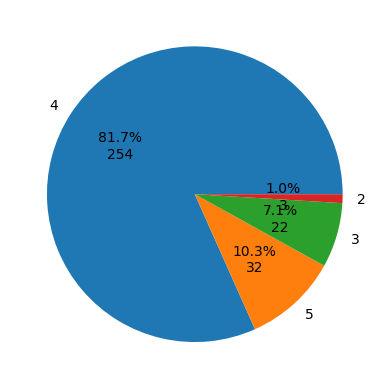

In [82]:
def plt_pie(df_p, f):
    total = df_p[f].value_counts().values.sum()
    def perc_cal(s):
        return '{:.1f}%\n{:.0f}'.format(s, total*s/100)
    df_p_cuisine = df_p[f].value_counts()
    plt.pie(df_p_cuisine.values, labels=df_p_cuisine.index, autopct=perc_cal)
    plt.show()

# plt_pie(df_p, 'Sugar')
# plt_pie(df_p, 'Salt')
plt_pie(df_p, 'Happiness_Level')

In [90]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
only_numerics = df_p.select_dtypes(include=numerics)
only_numerics.columns

Index(['size', 'Happiness_Level', 'Sugar', 'Salt', 'Healthy',
       'Processing_level', 'Food_Diversity'],
      dtype='object')

In [133]:
only_numerics = only_numerics[['Happiness_Level', 'Sugar', 'Salt', 'Healthy','Processing_level', 'Food_Diversity']]
only_numerics.corr()


,Happiness_Level,Sugar,Salt,Healthy,Processing_level,Food_Diversity
Happiness_Level,1.000000,0.290237,-0.037341,-0.029132,0.108371,0.093414
Sugar,0.290237,1.000000,-0.551170,-0.514042,0.664263,-0.306616
Salt,-0.037341,-0.551170,1.000000,0.096176,-0.331087,0.432985
Healthy,-0.029132,-0.514042,0.096176,1.000000,-0.618172,0.260545
Processing_level,0.108371,0.664263,-0.331087,-0.618172,1.000000,-0.302990
Food_Diversity,0.093414,-0.306616,0.432985,0.260545,-0.302990,1.000000


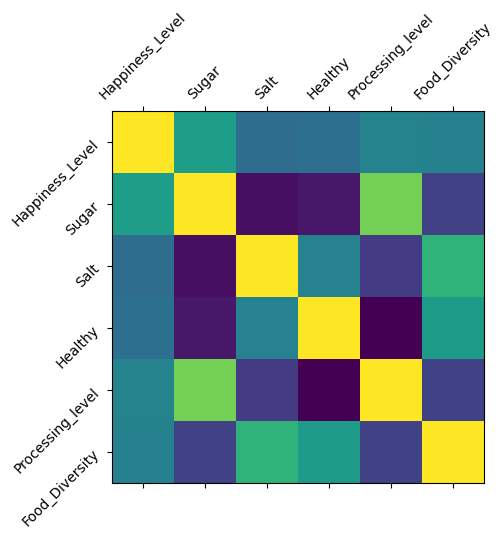

In [93]:
plt.matshow(only_numerics.corr())
plt.xticks(range(0,6),only_numerics.columns)
plt.yticks(range(0,6),only_numerics.columns)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='Happiness_Level', ylabel='Sugar'>

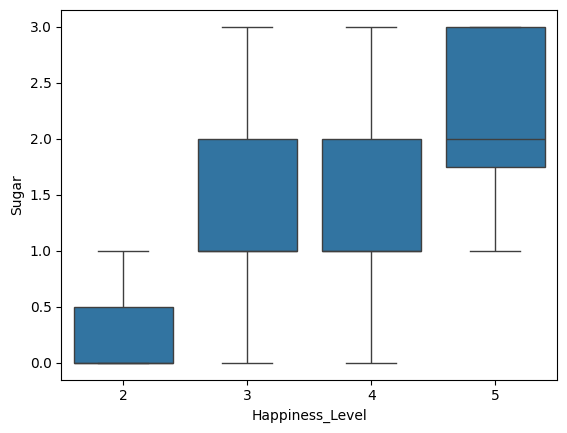

In [62]:
sns.boxplot(x = 'Happiness_Level', y = 'Sugar', data = df_p)

<Axes: xlabel='Healthy', ylabel='Cuisine'>

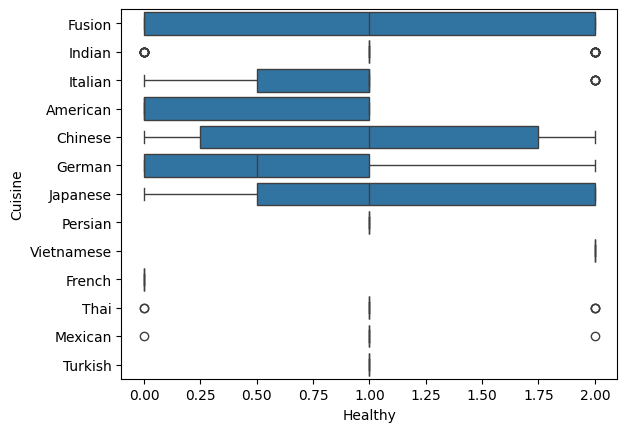

In [67]:
# 'Healthy','Processing_level', 'Food_Diversity'
sns.boxplot(x = 'Healthy', y = 'Cuisine', data = df_p)

### Cuisine ordered mostly


2. Factors Influencing Food Choices:


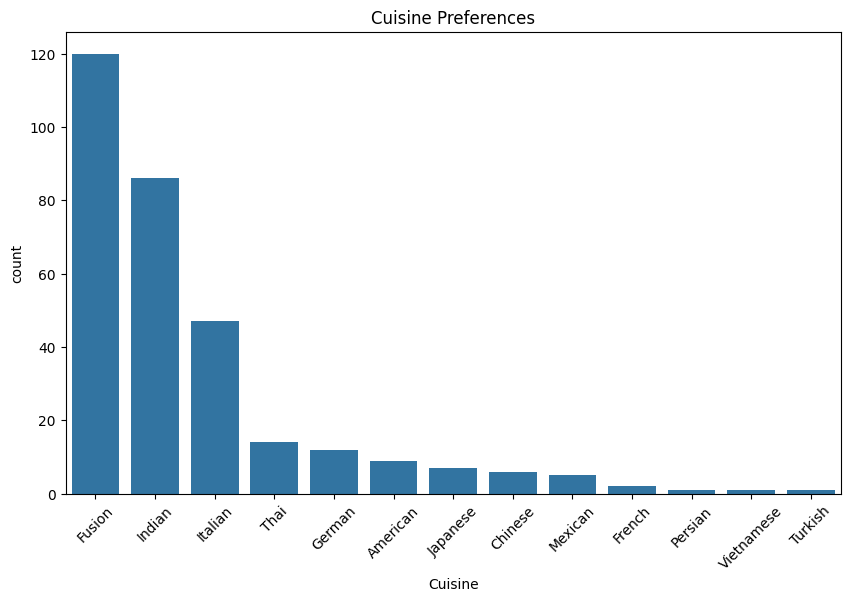

In [ ]:
print("\n Factors Influencing Food Choices:")
plt.figure(figsize=(10, 6))
sns.countplot(x='Cuisine', data=df_p, order = df_p['Cuisine'].value_counts().index)
plt.title('Cuisine Preferences')
plt.xticks(rotation=45)
plt.show()

#### What course of meal is mostly ordered

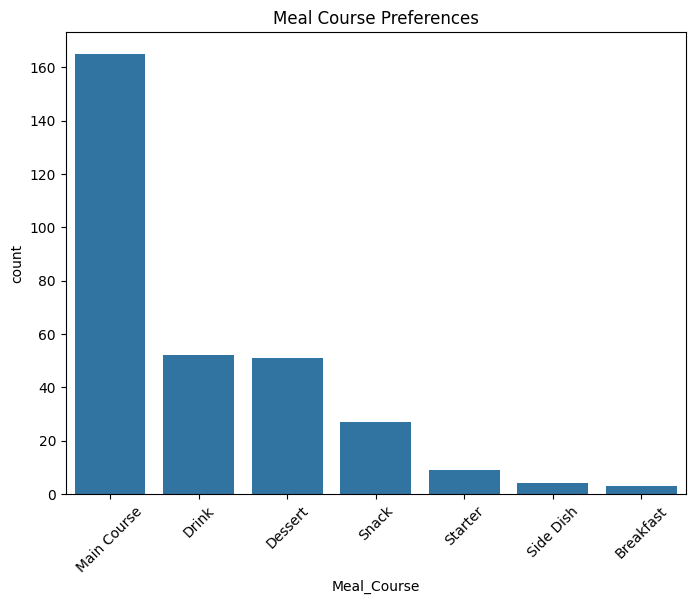

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Meal_Course', data=df_p, order = df_p['Meal_Course'].value_counts().index)
plt.title('Meal Course Preferences')
plt.xticks(rotation=45)
plt.show()

#### what colour of food consumed mostly

Fried/Carbs/Coffee/Drinks

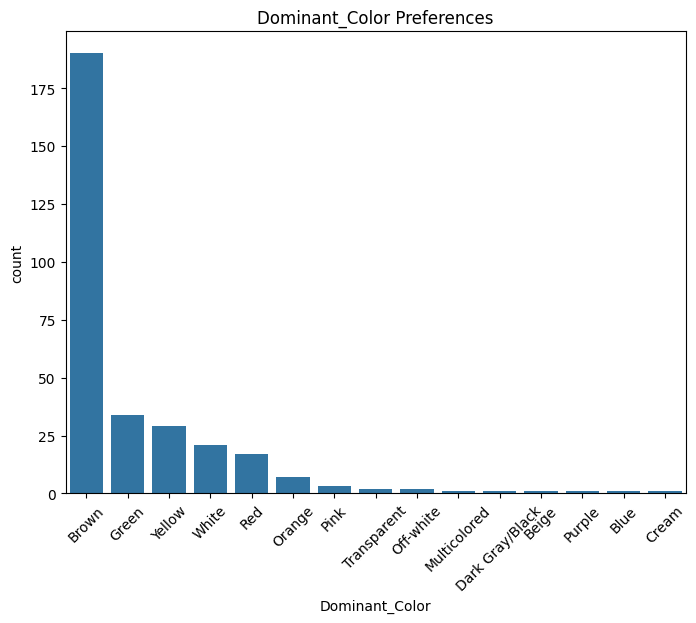

In [134]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dominant_Color', data=df_p, order = df_p['Dominant_Color'].value_counts().index)
plt.title('Dominant_Color Preferences')
plt.xticks(rotation=45)
plt.show()

#### Whats preparation method mostly liked

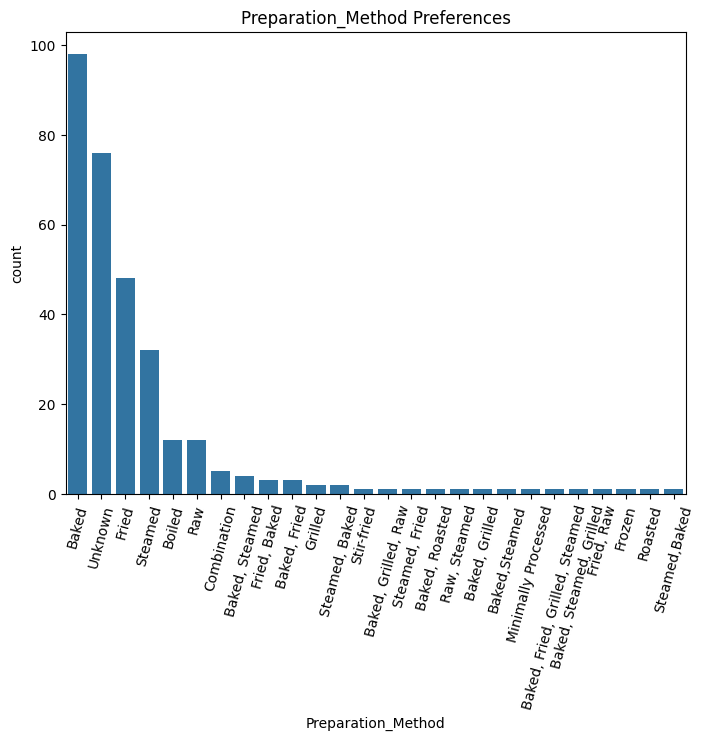

In [138]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Preparation_Method', data=df_p, order = df_p['Preparation_Method'].value_counts().index)
plt.title('Preparation_Method Preferences')
plt.xticks(rotation=75)
plt.show()

##### Of course, looks like you love breads and mixfood with love for fried and steamed

#### How much Sugar is used

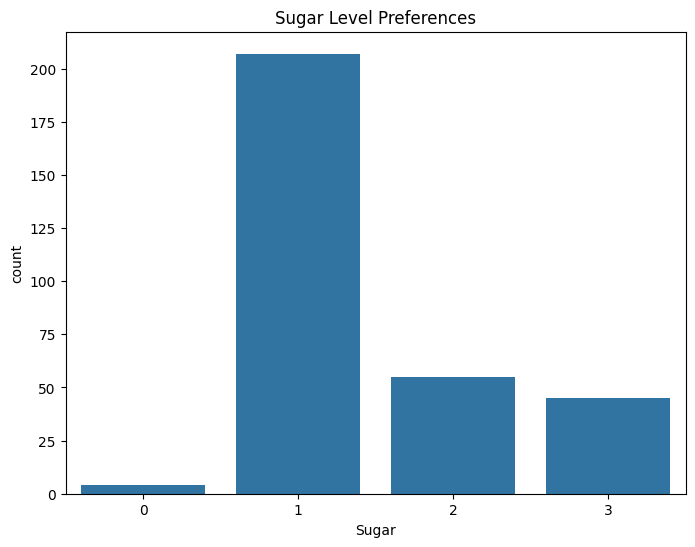

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sugar', data=df_p, order = [0,1,2,3])
plt.title('Sugar Level Preferences')
plt.show()


 Impact of Food Choices on Mood:


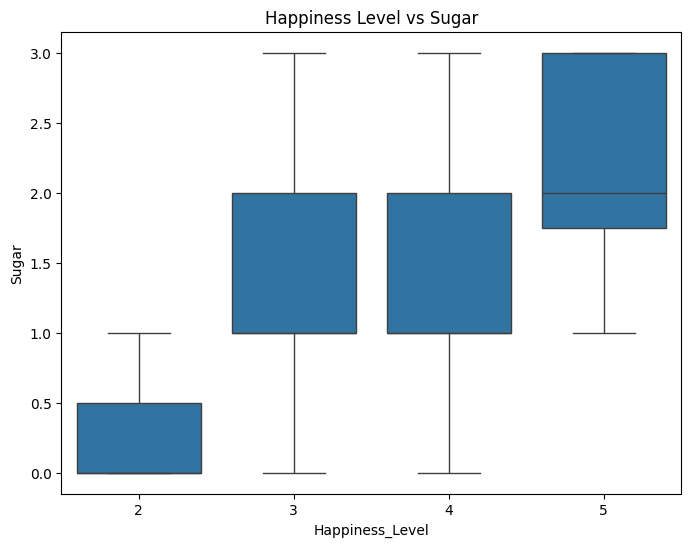

In [97]:
print("\n Impact of Food Choices on Mood:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Happiness_Level', y='Sugar', data=df_p)
plt.title('Happiness Level vs Sugar')
plt.show()

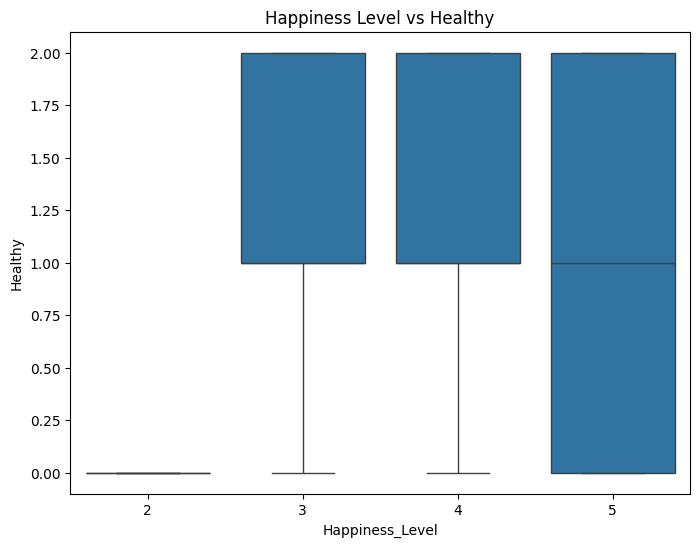

In [141]:
plt.figure(figsize=(8, 6))
# sns.boxplot(x='Happiness_Level', y='Healthy', data=df_p, order=['3','4','5'])
sns.boxplot(x='Happiness_Level', y='Healthy', data=df_p)
plt.title('Happiness Level vs Healthy')
plt.show()

In [104]:
df_p['date'] = pd.to_datetime(df_p['date'], format='%Y%m%d')
df_p['image_month'] = df_p['date'].dt.strftime('%Y-%m')
df_p.sample(5)

,name,size,date,Cuisine,Happiness_Level,Meal_Course,Sugar,Salt,Healthy,Processing_level,Preparation_Method,Dominant_Color,Food_Diversity,image_month
306,Food/PXL_20240514_151750908.jpg,1791787,2024-05-14,Italian,4,Drink,2,1,1,2,Unknown,Brown,1,2024-05
302,Food/PXL_20240213_152028001.jpg,2180975,2024-02-13,Indian,4,Main Course,1,2,2,1,Steamed,Brown,2,2024-02
29,Food/IMG-20220731-WA0000.jpg,234132,2022-07-31,Japanese,5,Main Course,1,2,1,2,Fried,Green,3,2022-07
2,Food/PXL_20240206_180208070.jpg,2462352,2024-02-06,Indian,4,Main Course,1,2,1,1,Baked,Brown,2,2024-02
57,Food/image(44).jpg,2292199,NaT,Unknown,4,Drink,1,1,1,1,Unknown,Red,1,NaN


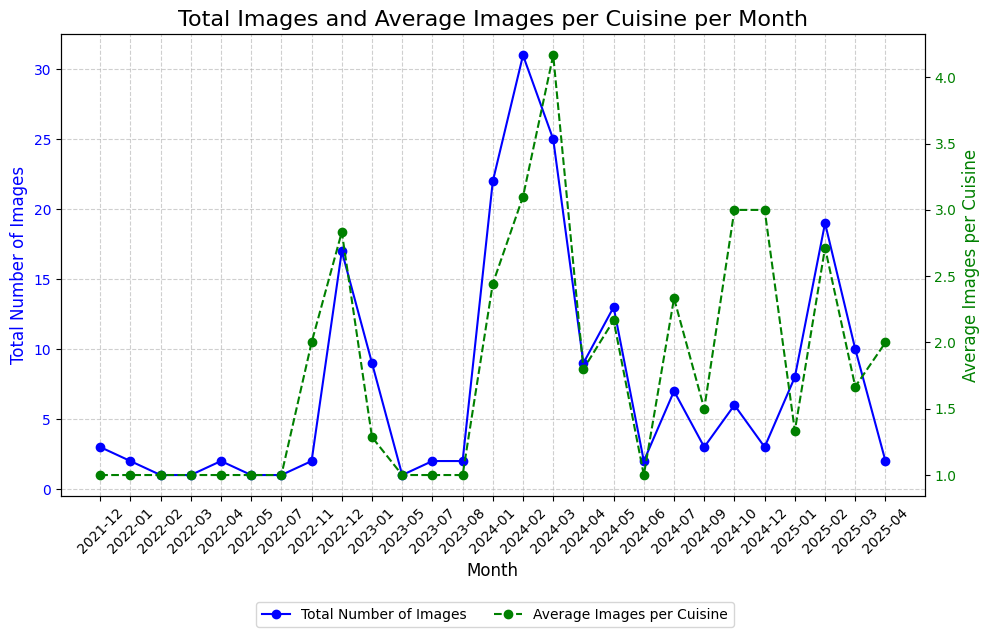

In [113]:
#Total Images per Month
monthly_image_counts = df_p.groupby('image_month')['name'].count().reset_index()
monthly_image_counts.rename(columns={'name': 'Total_Images'}, inplace=True)

#Average Images per Cuisine per Month
average_monthly_cuisine_images = df_p.groupby(['image_month', 'Cuisine'])['name'].count().reset_index()
average_monthly_cuisine_images = average_monthly_cuisine_images.groupby('image_month')['name'].mean().reset_index()
average_monthly_cuisine_images.rename(columns={'name': 'Average_Images_per_Cuisine'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total images
ax1.plot(monthly_image_counts['image_month'], monthly_image_counts['Total_Images'],
         label='Total Number of Images', marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Number of Images', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Second axis for average images per cuisine
ax2 = ax1.twinx()
ax2.plot(average_monthly_cuisine_images['image_month'], average_monthly_cuisine_images['Average_Images_per_Cuisine'],
         label='Average Images per Cuisine', marker='o', linestyle='--', color='green')
ax2.set_ylabel('Average Images per Cuisine', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Legend and title
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=10, ncol=2)
plt.title('Total Images and Average Images per Cuisine per Month', fontsize=16)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [132]:
#Total Images per Month
monthly_image_counts = df_p.groupby('image_month')['name'].count().reset_index()
monthly_image_counts.rename(columns={'name': 'Total_Images'}, inplace=True)
print(monthly_image_counts.sample(5))

#Average Images per sugar per Month
average_monthly_sugar_images = df_p.groupby(['image_month', 'Sugar'])['name'].count().reset_index()
average_monthly_sugar_images = average_monthly_sugar_images.groupby('image_month')['Sugar'].mean().reset_index()
average_monthly_sugar_images.rename(columns={'name': 'Average_Images_sugar_level'}, inplace=True)
print(average_monthly_sugar_images.sample(5))

#Average Images per happiness per Month
average_monthly_happy_images = df_p.groupby(['image_month', 'Happiness_Level'])['name'].count().reset_index()
average_monthly_happy_images = average_monthly_happy_images.groupby('image_month')['Happiness_Level'].mean().reset_index()
average_monthly_happy_images.rename(columns={'name': 'Average_Images_per_happiness'}, inplace=True)
average_monthly_happy_images.sample(5)


   image_month  Total_Images
9      2023-01             9
1      2022-01             2
16     2024-04             9
26     2025-04             2
22     2024-12             3
   image_month  Sugar
1      2022-01    1.5
10     2023-05    3.0
7      2022-11    2.0
13     2024-01    2.0
3      2022-03    1.0


,image_month,Happiness_Level
6,2022-07,5.0
1,2022-01,4.0
26,2025-04,4.0
2,2022-02,4.0
12,2023-08,4.0


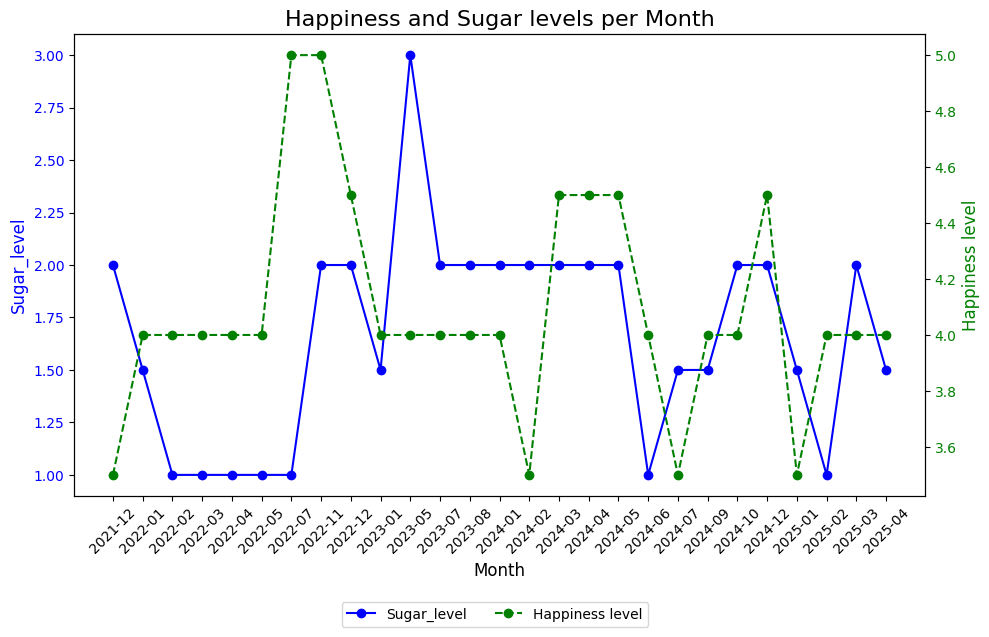

In [142]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total images
ax1.plot(average_monthly_sugar_images['image_month'], average_monthly_sugar_images['Sugar'],
         label='Sugar_level', marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Sugar_level', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
# ax1.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)


# Second axis for average images per cuisine
ax2 = ax1.twinx()
ax2.plot(average_monthly_happy_images['image_month'], average_monthly_happy_images['Happiness_Level'],
         label='Happiness level', marker='o', linestyle='--', color='green')
ax2.set_ylabel('Happiness level', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Legend and title
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=10, ncol=2)
plt.title('Happiness and Sugar levels per Month', fontsize=16)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [140]:
#Average Images per Dominant_Color per Month
average_monthly_dominant_images = df_p.groupby(['image_month', 'Dominant_Color'])['name'].count().reset_index()
average_monthly_dominant_images = average_monthly_dominant_images.groupby('image_month')['Dominant_Color'].mean().reset_index()
average_monthly_dominant_images.rename(columns={'name': 'Average_Images_per_Dominant_Color'}, inplace=True)
average_monthly_dominant_images.sample(5)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total images
ax1.plot(average_monthly_sugar_images['image_month'], average_monthly_sugar_images['Sugar'],
         label='Sugar_level', marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Sugar_level', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)


# Second axis for average images per cuisine
ax2 = ax1.twinx()
ax2.plot(average_monthly_dominant_images['image_month'], average_monthly_dominant_images['Dominant_Color'],
         label='Dominant_Color', marker='o', linestyle='--', color='green')
ax2.set_ylabel('Dominant_Color', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Legend and title
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=10, ncol=2)
plt.title('Dominant_Color and Sugar levels per Month', fontsize=16)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

TypeError: agg function failed [how->mean,dtype->object]